---

# Cinnecta Processo Seletivo Cientista de Dados

## Desafio Airbnb San Francisco 

### Viviane Renizia Mendes Silva
---

## Airbnb
O [Airbnb](https://www.airbnb.com) transformou radicalmente o setor de hospedagem, estabelecendo uma ponte entre pessoas que querem alugar suas propriedades e viajantes em busca de estadias únicas e sob medida. A plataforma oferece milhões de opções de acomodação ao redor do mundo, fomentando uma comunidade global de anfitriões e hóspedes.

Desde a sua fundação em 2008, o Airbnb já acumulou mais de **4 milhões de anfitriões**, que receberam **1,4 bilhão de hóspedes** em praticamente todos os países.

| Uma das inovações do Airbnb é a disponibilização de dados do seu site para algumas das cidades e locais mais importantes do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível fazer o download de uma vasta quantidade de dados, que podem ser utilizados para desenvolver projetos e análises em *Data Science*. | ![Analisando Airbnb](https://starpng.com/public/uploads/preview/airbnb-logo-png-image-transparent-11576529610h66k5pzqsg.png) |
| ----------------- | ------------------------------------------------------------ |
| (Para mais informações, acesse: [Sobre o Airbnb](https://news.airbnb.com/about-us/)) |                                                              |




---


## San Francisco, California - Estados Unidos

Fundada em 1776 por colonialistas espanhóis, a cidade iniciou com a construção do Presídio, perto da região da Golden Gate, e da Missão de São Francisco de Assis. Posteriormente, em 1849, após tornar-se território dos Estados Unidos, a cidade vivenciou o boom da corrida do ouro, tornando-se a mais significativa da costa oeste americana. Entretanto, em 1906, um devastador terremoto seguido por um grande incêndio destruiu cerca de 80% da cidade, marcando um dos momentos mais trágicos de sua história.

<center><img alt="Localização Havaí" width="70%" src="https://img.freepik.com/fotos-premium/sao-francisco-e-california-no-mapa-dos-eua-viagem-nos-eua_90380-2140.jpg?w=2000
"></center>

Atualmente, San Francisco oferece atividades o ano todo, independentemente do clima, seja chuva ou sol, frio ou mais frio - uma brincadeira comum devido ao seu clima notoriamente fresco, mesmo no verão. O clima varia entre os bairros: pode estar ensolarado no Golden Gate Park, mas nublado e ventoso no Embarcadero. Mesmo com tempo ruim em San Francisco, o sol pode estar brilhando em Sausalito.


<center><img alt="Cultura Havaíana" width="70%" src="https://f3m4u8n4.rocketcdn.me/wp-content/uploads/2018/03/roteiro-san-francisco-o-que-fazer-mapa-turismo.jpg"></center>

### **Pontos turísticos:**


> ### Ponte Golden Gate

> ### Lombard Street

> ###  Fisherman’s Wharf e Pier 39

> ### Aquarium of the Bay

> ### Ilha de Alcatraz

> ### Alamo Square e Painted Ladies

---
## Base de dados fornecida e objetivos
A base de dados airbnb.csv (dados abertos da plataforma airbnb) contém dados de casas e apartamentos que estão disponíveis para aluguel e as características que influenciam na composição do preço da locação. De posse dos dados, faça o processo de preparação, análise exploratória e modelagem com o objetivo de entender as características dos imóveis e auxiliar no agrupamento e/ou precificação dos imóveis de aluguel.

**O objetivo do problema proposto é ajudar as áreas de negócios do Airbnb a maximizar a rentabilidade e/ou a taxa de ocupação das casas e apartamentos disponíveis para aluguel.**

**OBS: Será avaliada a qualidade do código e a solução proposta para o problema. Uma sugestão de metodologias para produtização do modelo criado será um diferencial (Não precisa ser implementada).**

---

In [1]:
# Instalando o Pydeck
!pip install pydeck -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import folium
from folium.plugins import HeatMap
import pydeck as pdk

%matplotlib inline

#plt.rcParams['figure.figsize'] = (15, 12)
#plt.style.use('fivethirtyeight')

In [3]:
# Importando o arquivo xlsx fornecido e transformando em DataFrame
df_airbnb = pd.read_excel("Teste Prático_ Cientista de Dados_airbnb_21.03.2023.xlsx")

---
## Análise dos Dados


Antes de iniciar qualquer análise, é necessário verificar a estrutura do  *dataset*. Desse modo, serão analisadas as 5 primeiras entradas:

In [4]:
df_airbnb.head(5)

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
0,t,moderate,t,1.0,Western Addition,3776931.0,-12243386.0,Apartment,Entire home/apt,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f,strict_14_with_grace_period,f,2.0,Bernal Heights,3774511.0,-12242102.0,Apartment,Entire home/apt,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776669.0,-1224525.0,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776487.0,-12245183.0,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,f,strict_14_with_grace_period,f,2.0,Western Addition,3777525.0,-12243637.0,House,Entire home/apt,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Após verificar a estrutura do *dataset*, e seguir o dicionário fornecido, abaixo segue o dicionário das características que cada variável (coluna) representa.

Dicionário de dados:

> **host_is_superhost:** Indica se o anfitrião é um "superhost" no Airbnb, um título dado a anfitriões que oferecem experiências excepcionais aos hóspedes.

> **cancellation_policy:** Refere-se à política de cancelamento da propriedade. Pode variar de flexível a rigorosa.

> **instant_bookable:** Mostra se a propriedade pode ser reservada instantaneamente sem a necessidade de aprovação prévia do anfitrião.

> **host_total_listings_count:** O número total de listagens que o anfitrião possui no Airbnb.

> **neighbourhood_cleansed:** Uma avaliação da limpeza do bairro onde a propriedade está localizada.

> **latitude:** A latitude geográfica da propriedade.

> **longitude:** A longitude geográfica da propriedade.

> **property_type:** O tipo de propriedade, como apartamento, casa, estúdio, etc.

> **room_type:** Tipo de quarto oferecido, como quarto inteiro, quarto compartilhado ou casa/apartamento inteiro.

> **accommodates:** O número máximo de pessoas que a propriedade pode acomodar.

> **bathrooms:** O número de banheiros disponíveis na propriedade.

> **bedrooms:** O número de quartos na propriedade.

> **beds:** O número total de camas disponíveis na propriedade.

> **bed_type:** O tipo de cama disponível, como cama de casal, solteiro, sofá-cama, etc.

> **minimum_nights:** O número mínimo de noites requerido para reservar a propriedade.

> **number_of_reviews:** O número total de avaliações que a propriedade recebeu.

> **review_scores_rating:** A pontuação geral de avaliação da propriedade, geralmente de 1 a 100.

> **review_scores_accuracy:** Pontuação relativa à precisão da descrição da propriedade nos anúncios.

> **review_scores_cleanliness:** Pontuação relativa à limpeza da propriedade.

> **review_scores_checkin:** Pontuação relativa à experiência de check-in.

> **review_scores_communication:** Pontuação relativa à comunicação com o anfitrião.

> **review_scores_location:** Pontuação relativa à localização da propriedade.

> **review_scores_value:** Pontuação relativa ao valor geral da estadia.

> **price:** O preço da estadia por noite.

> **review_scores_rating_na:** Número de avaliações relacionadas à pontuação de avaliação geral.

> **review_scores_accuracy_na:** Número de avaliações relacionadas à pontuação de precisão da descrição da propriedade.

> **review_scores_cleanliness_na:** Número de avaliações relacionadas à pontuação de limpeza da propriedade.

> **review_scores_checkin_na:** Número de avaliações relacionadas à pontuação do processo de check-in.

> **review_scores_communication_na:** Número de avaliações relacionadas à pontuação de comunicação com o anfitrião.

> **review_scores_location_na:** Número de avaliações relacionadas à pontuação da localização da propriedade.

> **review_scores_value_na:** Número de avaliações relacionadas à pontuação do valor geral da estadia.

> **bedrooms_na:** Número de quartos.

> **bathrooms_na:** Número de banheiros.

> **beds_na:** Número de camas.

### **Quantidade de atributos (variáveis) e de entradas do conjunto de dados**

In [5]:
# Volume de dados do DataFrame
print(f'Entradas no DataFrame: {df_airbnb.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {df_airbnb.shape[1]} colunas no total')

Entradas no DataFrame: 7146 linhas no total
Variáveis no DataFrame: 34 colunas no total


In [6]:
# Verificar os tipos das variáveis
display(df_airbnb.dtypes)

host_is_superhost                  object
cancellation_policy                object
instant_bookable                   object
host_total_listings_count         float64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                      float64
bathrooms                          object
bedrooms                          float64
beds                              float64
bed_type                           object
minimum_nights                    float64
number_of_reviews                 float64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
price                             

### **Porcentagem de valores ausentes no *dataset***

Pode-se notar que, surpreendentemente, nenhuma variável no *dataset* apresenta valores ausentes:

In [7]:
missing_values = df_airbnb.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_percentage = (missing_values / len(df_airbnb)) * 100

missing_df = pd.DataFrame({'Variáveis faltantes': missing_values, 'Porcentagem': missing_values_percentage})
missing_df.sort_values(by='Porcentagem', ascending=False)

,Variáveis faltantes,Porcentagem


### **Tipo de distribuição das variáveis** 

Será utilizado o **histograma** para identificar a distribuição das variáveis do *dataset*. 

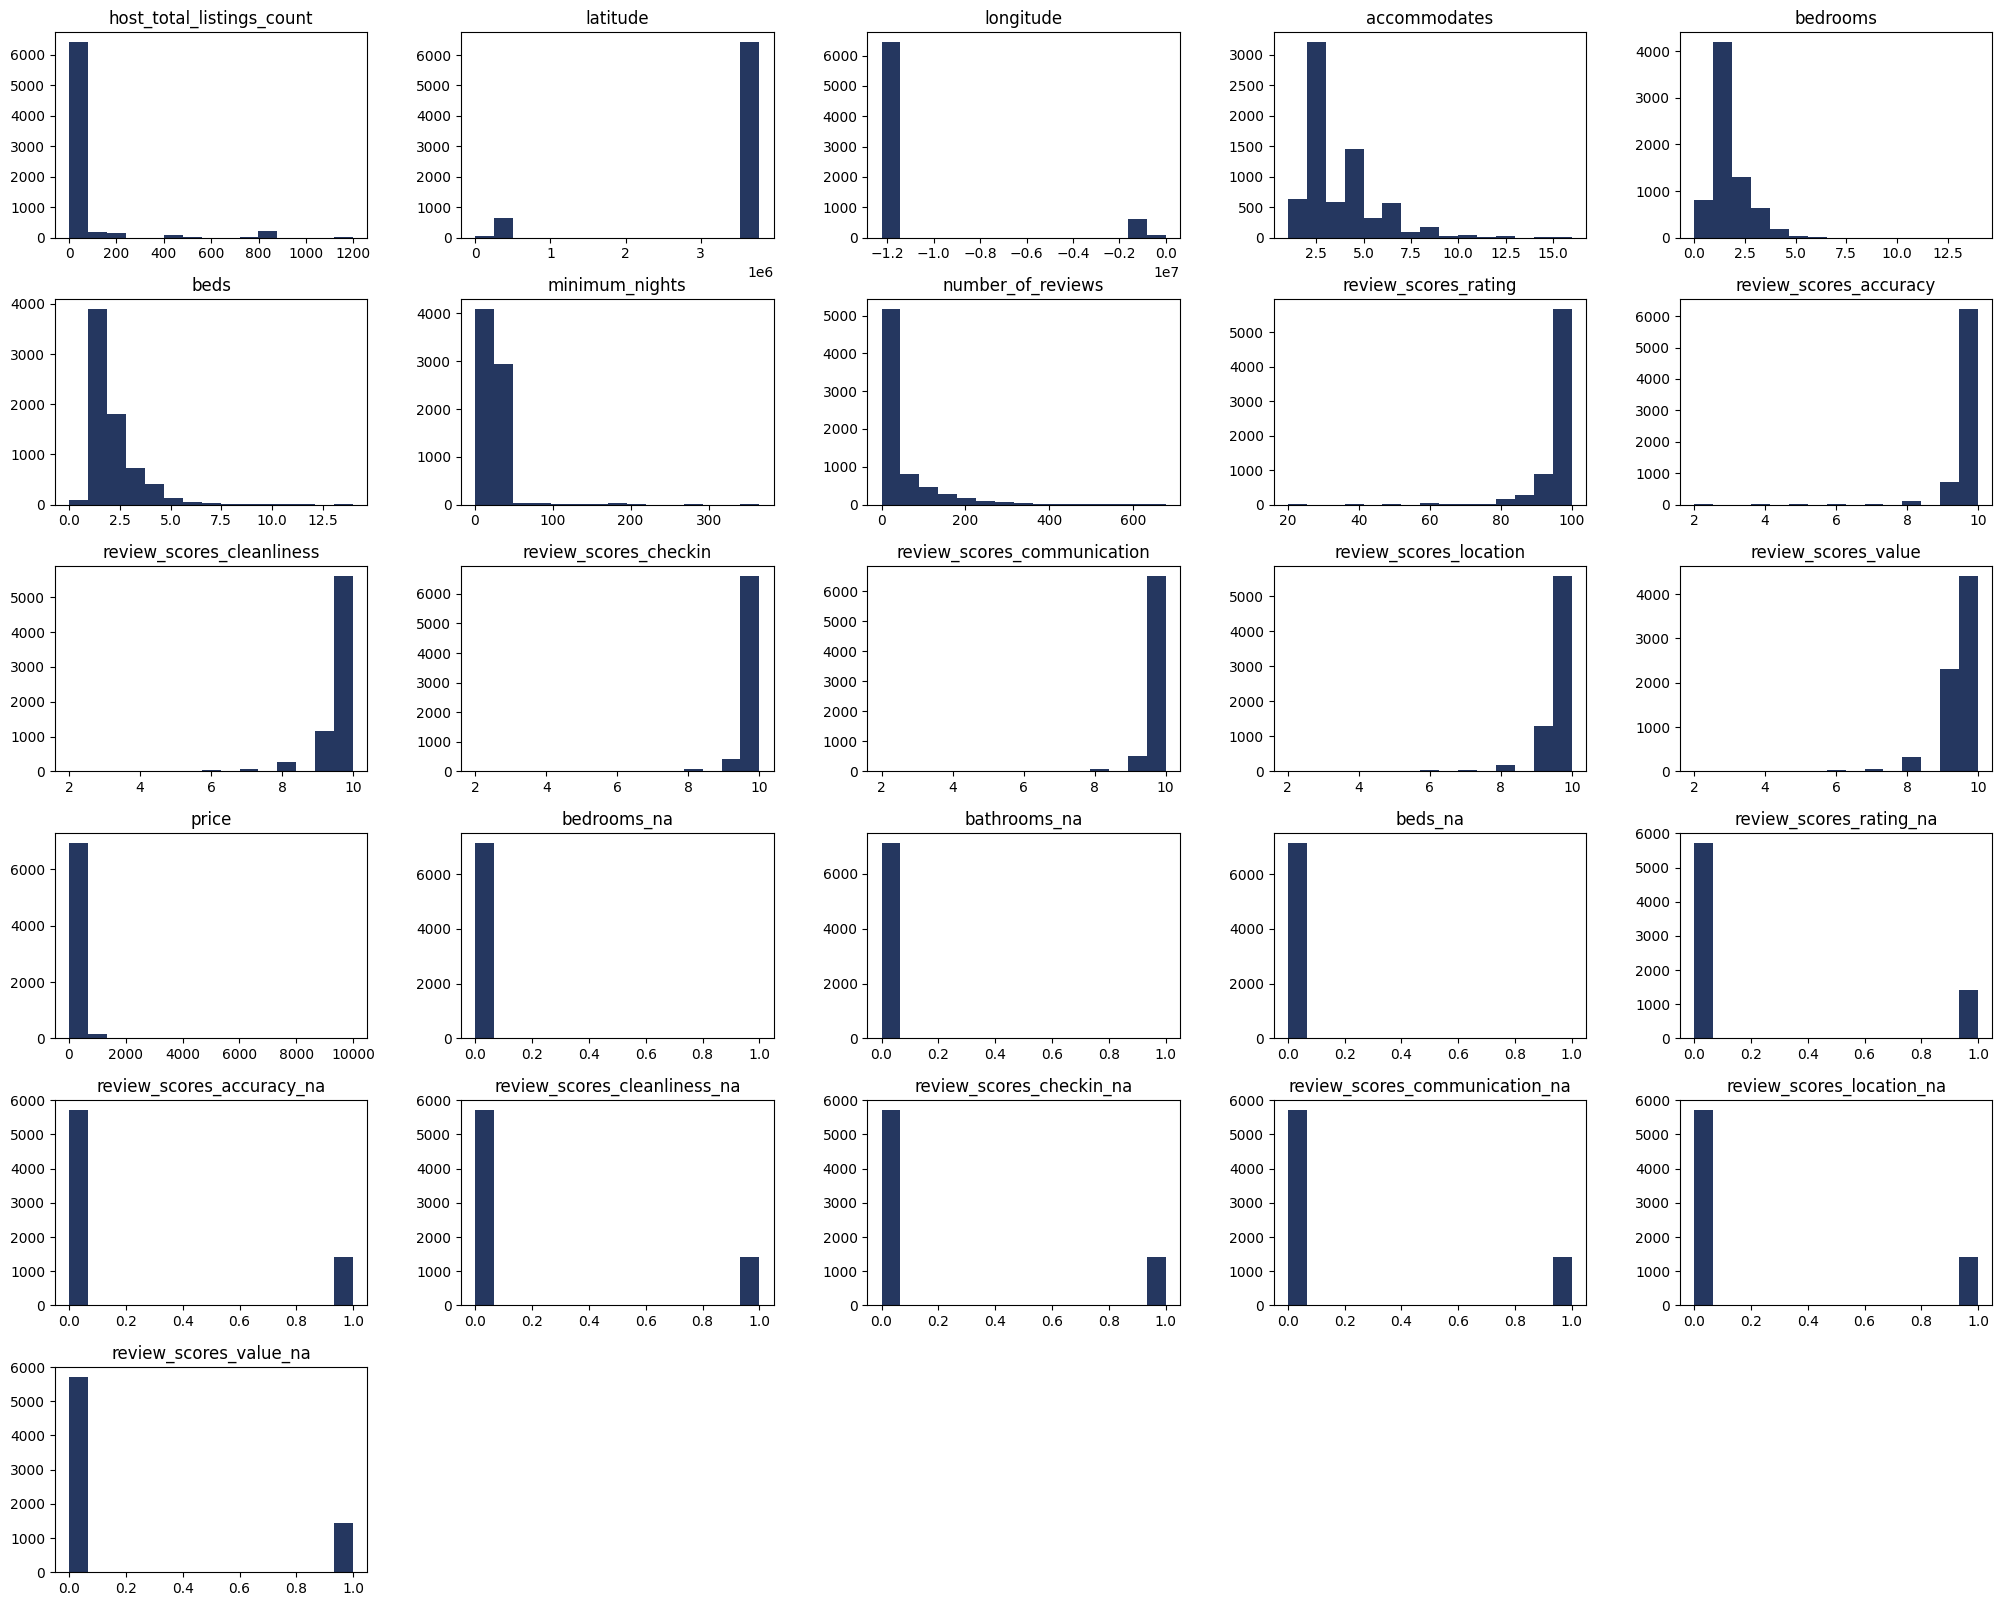

In [8]:
# Histograma das variáveis numéricas
df_airbnb.hist(bins=15, figsize=(25, 20), grid=False, color="#253760");

#### **Verificação de Outliers** 
***Outliers*** podem influenciar a análise de dados, já que, por serem valores que se diferenciam significativamente do restante dos dados de um *dataset*, podem influenciar a análise para um viés que não represente a realidade da melhor forma. 

Sendo assim, pela distribuição dos histogramas, é possível verificar indícios da presença de valores atípicos, como na variável `price`. Além disso, as variáveis de latitude e longitude parecem apresentar valores inconsistentes com valores que representam esse tipo de informação. 

Em relação a variável price, serão realizadas duas verificações rápidas para detectação de *outliers*:
 - Resumo estatístico pelo método `describe()`;
 - Análise por meio do `boxplot` das variáveis.
 
As variáveis de longitude e latitude serão tratadas posteriormente.

#### Resumo estatístico pelo método `describe()`:

In [9]:
pd.set_option('display.max_columns', None) # Mostra todas as colunas ocultas na visualização
df_airbnb.describe()

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
count,7146.000000,7.146000e+03,7.146000e+03,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000
mean,52.604954,3.430809e+06,-1.114719e+07,3.201092,1.342709,1.764484,15.817800,43.553876,96.034285,9.820319,9.699552,9.895886,9.872796,9.719144,9.524349,213.309824,0.000280,0.002939,0.000980,0.198853,0.199412,0.199272,0.199692,0.199132,0.199692,0.199832
std,177.428653,1.033566e+06,3.319669e+06,1.914916,0.932855,1.176789,22.511624,72.538481,6.286139,0.601990,0.703877,0.448704,0.522599,0.659253,0.751603,311.375499,0.016728,0.054134,0.031285,0.399165,0.399586,0.399481,0.399797,0.399376,0.399797,0.399902
min,0.000000,3.772000e+01,-1.225131e+07,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.774272e+06,-1.224408e+07,2.000000,1.000000,1.000000,2.000000,1.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.776318e+06,-1.224227e+07,2.000000,1.000000,1.000000,4.000000,11.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,3.778220e+06,-1.224077e+07,4.000000,2.000000,2.000000,30.000000,54.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1199.000000,3.781031e+06,-1.223900e+02,16.000000,14.000000,14.000000,365.000000,677.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Pelo resumo estatístico, em relação a variável price, nota-se que:
- **Contagem (count):** Existem 7.146 entradas de preços, o que sugere um conjunto de dados de tamanho considerável, e todos os valores de preço do dataset são válidos, uma vez que o número de valores válidos e o número total de linhas do dataset são o mesmo.
- **Média (mean):** O preço médio listado é aproximadamente 213,30 dólares. Isso é uma média de todos os preços listados e pode ser influenciada por valores muito altos ou muito baixos.
- **Desvio Padrão (std):** O desvio padrão é de aproximadamente 311,37 dólares, indicando que há uma variação significativa nos preços. Um desvio padrão mais alto sugere que os preços não estão agrupados de perto em torno da média.
- **Mínimo (min):** O preço mais baixo listado é 10 dólares, o que é **bastante** acessível.
- **Primeiro Quartil (25%):** 25% dos preços estão abaixo de 100 dólares, o que pode indicar uma gama de opções acessíveis na lista.
- **Mediana (50%):** A mediana dos preços é 150 dólares. Como a mediana é menos sensível a valores extremos do que a média, isso pode ser uma melhor representação do 'preço típico'.
- **Terceiro Quartil (75%):** 75% dos preços estão abaixo de 235 dólares. Isso mostra que a maioria das listagens tem um preço abaixo desse valor.
- **Máximo (max):** O preço mais alto listado é 10.000 dólares, o que é excepcionalmente alto comparado ao restante dos dados e sugere a presença de outliers.

#### Boxplot para `price`:

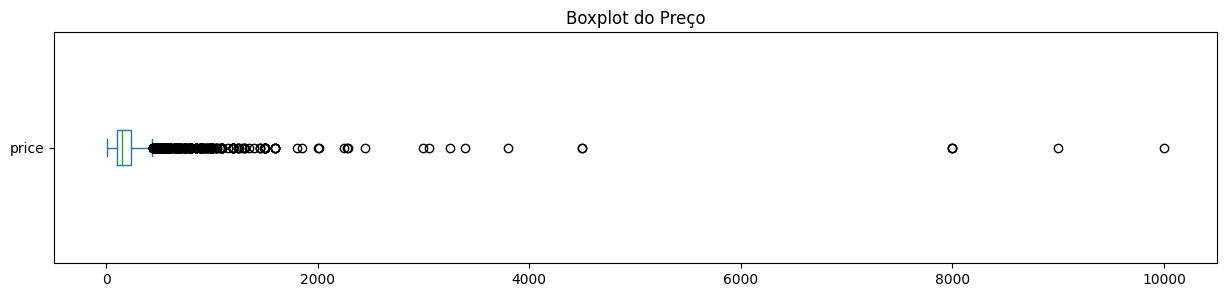

In [10]:
df_airbnb['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.title('Boxplot do Preço')
plt.show()

#### **Lidando com outliers:**

Para lidar com outliers, podemos calcular o intervalo interquartílico (IQR), que é a diferença entre o terceiro e o primeiro quartil, para avaliar a dispersão dos dados centrais e identificar outliers. Outliers são frequentemente definidos como valores abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR.

In [11]:
Q1 = df_airbnb['price'].quantile(0.25)
Q3 = df_airbnb['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Limite inferior: {lower_bound} \nLimite superior: {upper_bound}")

Limite inferior: -102.5 
Limite superior: 437.5


O intervalo interquartílico (IQR), (que é, como dito anteriormente, a diferença entre o terceiro quartil e o primeiro quartil), é de 135 dólares (235 - 100), indicando a faixa de preço dentro da qual a maioria dos dados se encontra. 

Valores acima de **100 + 1.5 × IQR** ou abaixo de **100 − 1.5 × IQR** seriam considerados outliers. Com base nesses cálculos, os valores acima de **437,50** dólares poderiam ser considerados outliers. A presença de um valor máximo de 10.000 dólares confirma que há outliers significativos afetando a média.

Obs: Um valor de **-102,5** dólares não faz sentido no contexto de preços, pois não podemos ter um preço negativo. Isso significa que, de acordo com este método de detecção de outliers, não há outliers pequenos em termos de preços baixos no conjunto de dados. Todos os valores de 'price' acima de zero e abaixo do primeiro quartil são considerados normais nesse contexto.

In [12]:
# Cópia do antigo DataFrame para a remoção dos outliers
df_clean = df_airbnb.copy()

df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

original_shape = df_airbnb.shape
filtered_shape = df_clean.shape

# Comparação dos tamanhos dos Dataset: Original X Sem outliers
print(f'Tamanho do Dataset antes da limpeza: ', original_shape)
print(f'Tamanho do Dataset após a limpeza: ', filtered_shape)

Tamanho do Dataset antes da limpeza:  (7146, 34)
Tamanho do Dataset após a limpeza:  (6578, 34)


#### Comparação de distribuição pelos histogramas após remoção de outliers:

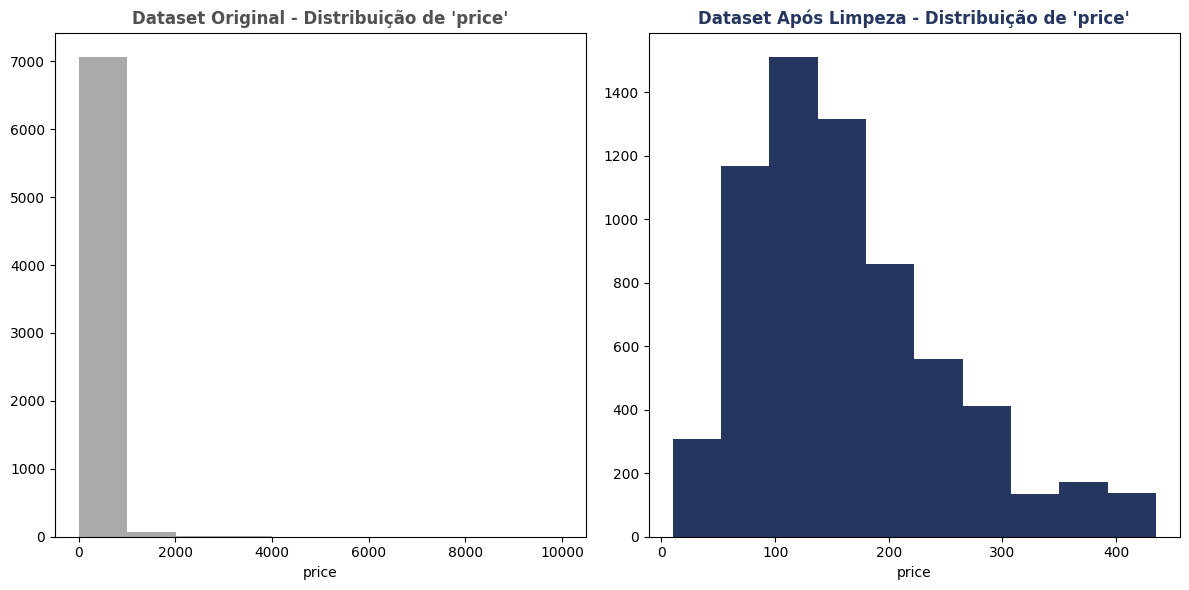

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df_airbnb['price'], bins=10, color="#AAAAAA")
ax1.set_title("Dataset Original - Distribuição de 'price'", color="#515151", fontweight='bold')
ax1.set_xlabel('price')
ax1.grid(False)

ax2.hist(df_clean['price'], bins=10, color="#253760")
ax2.set_title("Dataset Após Limpeza - Distribuição de 'price'", color="#253760", fontweight='bold')
ax2.set_xlabel('price')
ax2.grid(False)

plt.tight_layout()
plt.show()


In [14]:
# Resumo estatístico após limpeza dos outliers
df_clean.describe()

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
count,6578.000000,6.578000e+03,6.578000e+03,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,56.444968,3.428587e+06,-1.113869e+07,2.954545,1.223472,1.633931,16.385223,45.733810,95.891456,9.813621,9.687291,9.893737,9.868501,9.711614,9.525540,161.932806,0.000152,0.003192,0.001064,0.200669,0.201277,0.201125,0.201581,0.200973,0.201581,0.201733
std,183.972263,1.036336e+06,3.331590e+06,1.621535,0.802487,1.017447,22.460012,74.750606,6.428168,0.617457,0.721291,0.454518,0.527379,0.669037,0.757127,85.017300,0.012330,0.056416,0.032606,0.400531,0.400985,0.400872,0.401211,0.400758,0.401211,0.401324
min,0.000000,3.772000e+01,-1.225131e+07,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.774172e+06,-1.224411e+07,2.000000,1.000000,1.000000,2.000000,1.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.776281e+06,-1.224223e+07,2.000000,1.000000,1.000000,4.000000,12.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,147.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,3.778116e+06,-1.224076e+07,4.000000,2.000000,2.000000,30.000000,59.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1199.000000,3.781031e+06,-1.224100e+02,15.000000,14.000000,14.000000,365.000000,677.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,435.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Lidando com escalas erradas:**

Como mencionado anteriormente, os campos de latitude e longitude parecem conter valores inconsistentes para esse tipo de dado. Como sabemos:

> Latitude: A latitude varia de 0° no Equador até +90° no Polo Norte e -90° no Polo Sul.

> Longitude: A longitude varia de 0° em Greenwich até +180° a leste e -180° a oeste.

> Cada grau pode ser subdividido em minutos (') e segundos ("), para uma medição mais precisa. Por exemplo, uma latitude pode ser expressa como 35° 15' 30", onde 35° são os graus, 15' são os minutos e 30" são os segundos.

In [15]:
# Analisando os valores para esses variáveis
df_clean[['latitude', 'longitude']]

,latitude,longitude
0,3776931.0,-12243386.0
1,3774511.0,-12242102.0
2,3776669.0,-1224525.0
3,3776487.0,-12245183.0
5,3778471.0,-12244555.0
...,...,...
7141,3774884.0,-1224283.0
7142,3780645.0,-12242109.0
7143,3778855.0,-1224311.0
7144,3778645.0,-12241458.0


Observando os valores acimas podemos perceber que de fato os valores não estão consistentes com o esperado. Esse problema pode ser atribuído a escala dos dados que não estão em conformidade. Para resolver o problema podemos realizar cálculos simples:

In [16]:
# Vamos dividr ambos os valores por 10000 para alcançar a escala correta
df_clean.loc[:, 'latitude'] = df_clean['latitude'] / 10000
df_clean.loc[:, 'longitude'] = df_clean['longitude'] / 10000

df_clean[['latitude', 'longitude']]

,latitude,longitude
0,377.6931,-1224.3386
1,377.4511,-1224.2102
2,377.6669,-122.4525
3,377.6487,-1224.5183
5,377.8471,-1224.4555
...,...,...
7141,377.4884,-122.4283
7142,378.0645,-1224.2109
7143,377.8855,-122.4311
7144,377.8645,-1224.1458


Com essa pequena amostra podemos perceber que os dados mudaram a escala, mas nem todos estão corretos. Por exemplo, as primeira duas linhas contem valores 10 vezes maiores do que o correto, já a linha 3 está em conformidade. Dessa forma, vamos adotar a seguinte estratégia:

Vamos verificar quais valores estão fora dos limites superiores para latitude e longitude e, para esses, dividir por 10:

In [17]:
correction_factor = 10
df_clean.loc[:, 'longitude'] = df_clean.apply(
    lambda row: row['longitude'] / correction_factor if abs(row['longitude']) > 180 else row['longitude'],
    axis=1
)
df_clean.loc[:, 'latitude'] = df_clean.apply(
    lambda row: row['latitude'] / correction_factor if abs(row['latitude']) > 90 else row['latitude'],
    axis=1
)

df_clean = df_clean[
    (df_clean['latitude'].between(24.396308, 49.384358)) &
    (df_clean['longitude'].between(-125.000000, -66.934570))
]


df_clean[['latitude', 'longitude']]

,latitude,longitude
0,37.76931,-122.43386
1,37.74511,-122.42102
2,37.76669,-122.45250
3,37.76487,-122.45183
5,37.78471,-122.44555
...,...,...
7141,37.74884,-122.42830
7142,37.80645,-122.42109
7143,37.78855,-122.43110
7144,37.78645,-122.41458


Pronto, agora todos os valores de latitude e longitude devem estar em conformidade com os limites para esse tipo de dado. Podemos prosseguir!

### Correlação existente entre as variáveis**

A correlação entre variáveis é uma medida estatística que indica o grau de relação linear entre duas ou mais variáveis. Ela avalia se os dados estão relacionados positivamente (aumentam ou diminuem juntos) ou negativamente (um aumenta enquanto o outro diminui).

A intensidade dessa relação pode variar de -1 a 1. Uma correlação próxima de 1 ou -1 indica uma forte relação, enquanto uma correlação próxima de 0 indica uma fraca ou nenhuma relação.

Para identificar se há correlações existentes entre as variáveis de interesse, utilizarei:
 - Matriz de correlação;
 - *Heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [18]:
# Selecionando apenas colunas numéricas
df_numerico = df_clean.select_dtypes(include=['float64', 'int64'])

# Removendo as colunas 'latitude' e 'longitude'
df_numerico = df_numerico.drop(['beds_na', 'bathrooms_na', 'bedrooms_na'], axis=1)

# Calculando a matriz de correlação
corr = df_numerico.corr()

# Exibindo a matriz de correlação
display(corr)

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
host_total_listings_count,1.000000,0.181986,0.185864,0.001046,-0.015310,-0.051484,0.170813,-0.172141,0.032579,0.024394,0.054459,0.003382,-0.013186,0.027485,0.045780,0.081573,0.315503,0.314674,0.314882,0.314264,0.315089,0.314264,0.314060
latitude,0.181986,1.000000,0.186017,-0.078526,-0.156385,-0.080010,0.163663,-0.108244,-0.022434,-0.027482,-0.013825,-0.045115,-0.045957,0.201877,-0.012163,0.149105,0.174475,0.173558,0.173714,0.173776,0.173907,0.173776,0.174152
longitude,0.185864,0.186017,1.000000,-0.082642,-0.108890,-0.086696,0.115769,-0.127316,0.012866,-0.008477,0.011238,-0.031335,-0.025455,-0.011654,0.016663,0.072674,0.130015,0.129071,0.129153,0.128300,0.130062,0.128300,0.128081
accommodates,0.001046,-0.078526,-0.082642,1.000000,0.697772,0.822696,0.004147,-0.054658,0.038587,0.015366,0.001148,0.008433,0.015150,0.013500,-0.027989,0.564806,-0.020565,-0.020024,-0.020278,-0.020467,-0.020056,-0.020467,-0.020688
bedrooms,-0.015310,-0.156385,-0.108890,0.697772,1.000000,0.675678,0.027777,-0.068761,0.067761,0.023598,0.003733,0.014124,0.012979,0.014901,0.002575,0.507886,-0.026112,-0.025549,-0.025931,-0.025750,-0.025831,-0.025750,-0.025850
beds,-0.051484,-0.080010,-0.086696,0.822696,0.675678,1.000000,0.037427,-0.059114,0.006995,-0.010973,-0.055886,-0.012267,-0.003188,-0.002605,-0.037955,0.440564,-0.024909,-0.024706,-0.024852,-0.025173,-0.024618,-0.025173,-0.025406
minimum_nights,0.170813,0.163663,0.115769,0.004147,0.027777,0.037427,1.000000,-0.252951,-0.082060,-0.098915,-0.084951,-0.108129,-0.108704,-0.025960,-0.052763,-0.051644,0.275478,0.276644,0.276487,0.276455,0.275810,0.276455,0.276612
number_of_reviews,-0.172141,-0.108244,-0.127316,-0.054658,-0.068761,-0.059114,-0.252951,1.000000,-0.001162,0.063371,0.027269,0.080291,0.066520,-0.007705,-0.021975,-0.128383,-0.306129,-0.306691,-0.306548,-0.306977,-0.306405,-0.306977,-0.307119
review_scores_rating,0.032579,-0.022434,0.012866,0.038587,0.067761,0.006995,-0.082060,-0.001162,1.000000,0.705154,0.676852,0.492251,0.603263,0.486815,0.703191,0.178162,0.164641,0.160653,0.160453,0.161054,0.165040,0.161054,0.160059
review_scores_accuracy,0.024394,-0.027482,-0.008477,0.015366,0.023598,-0.010973,-0.098915,0.063371,0.705154,1.000000,0.636810,0.514840,0.570594,0.397475,0.604776,0.120249,0.151179,0.151472,0.151399,0.151618,0.151326,0.151618,0.150447


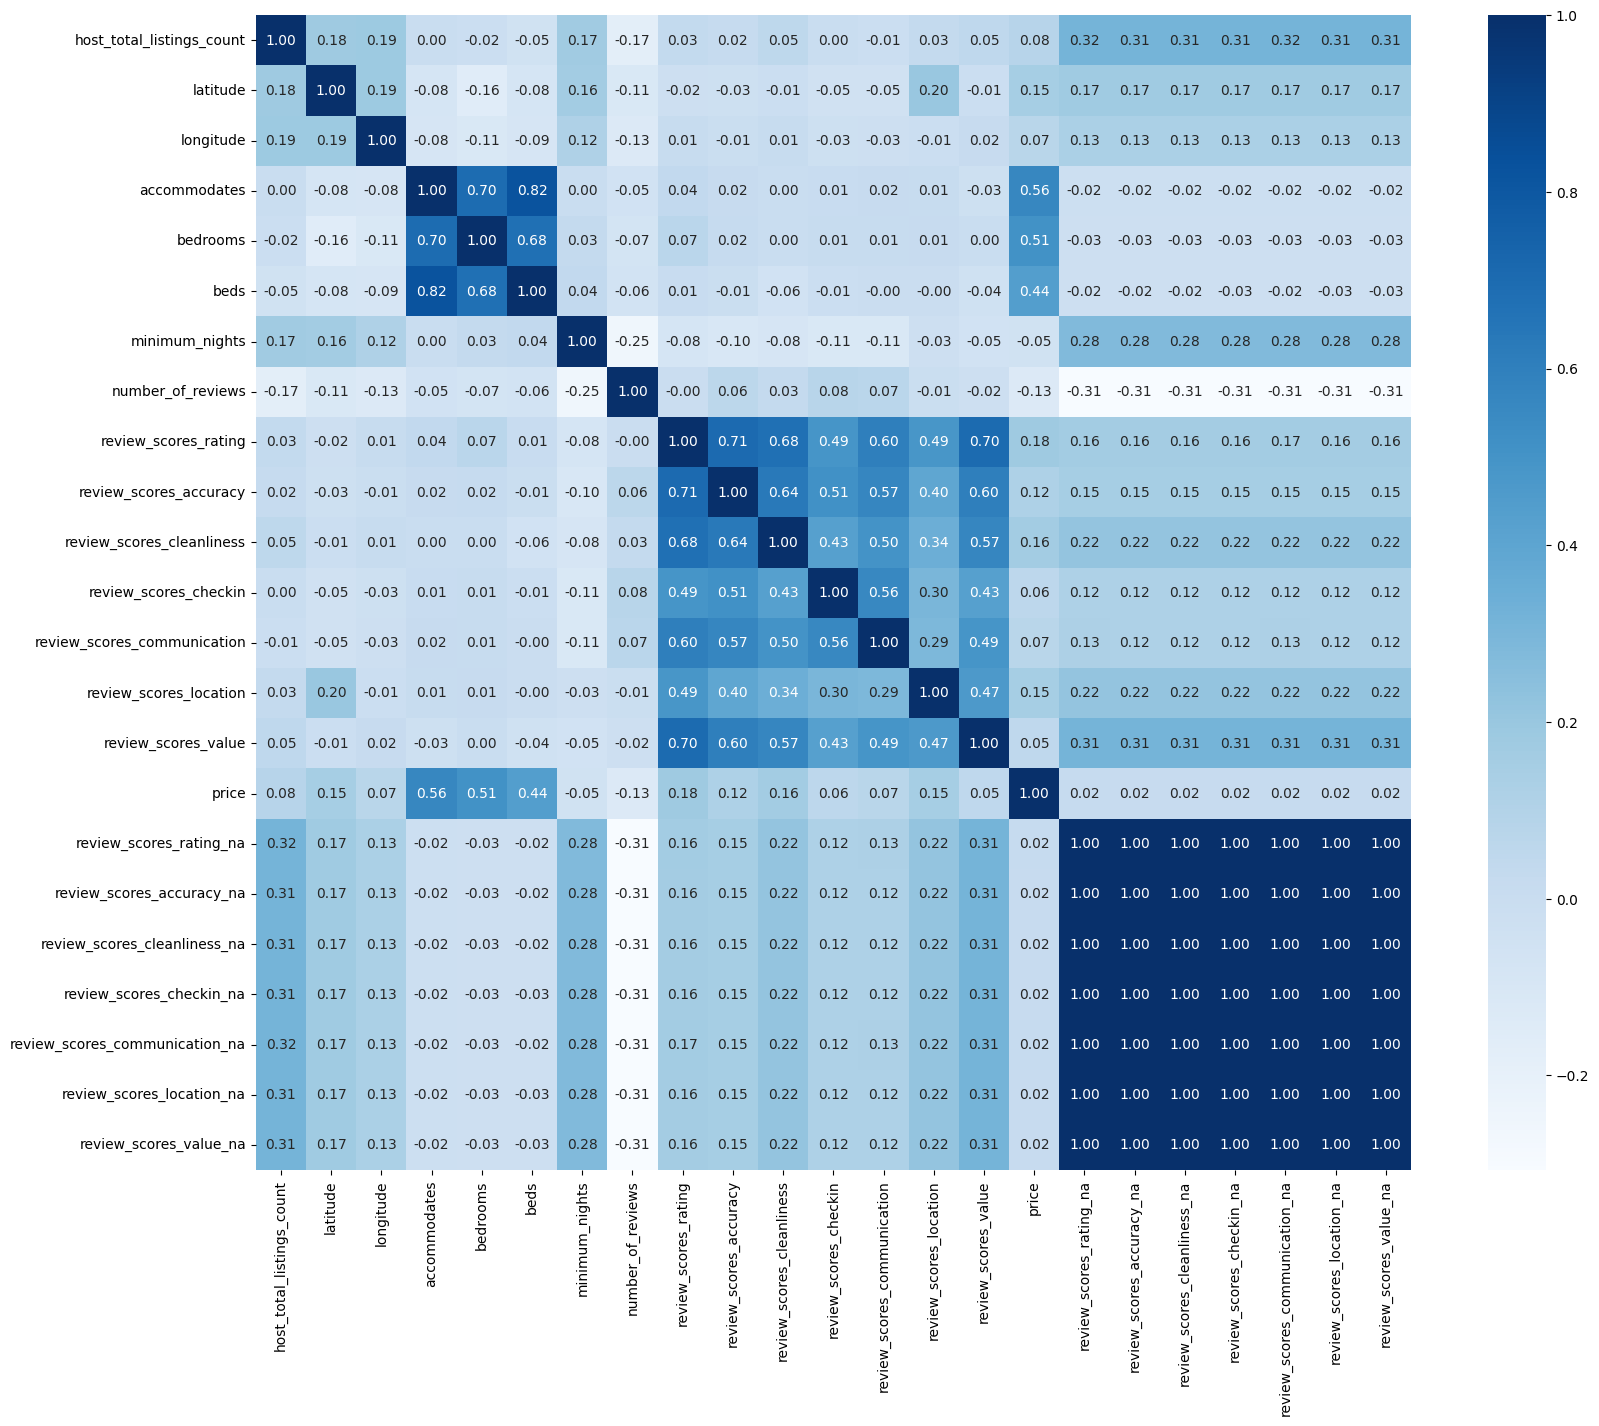

In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

### **Tipo de imóvel mais alugado no Airbnb**

In [20]:
tipos_unicos = df_clean['room_type'].unique()
print(tipos_unicos)

['Entire home/apt' 'Private room' 'Shared room']


A coluna `room_type` refere-se ao tipo de acomodação disponível para aluguel anunciado no Airbnb. Essa variável indica o estilo ou categoria do espaço que está sendo oferecido, podendo ser:
 - *Entire home/apt* (casa/apartamento inteiro) 
 - *Private room* (quarto privativo)
 - *Shared room* (quarto compartilhado)

Text(0.5, 1.0, 'Porcentagem dos Tipos de Imóveis')

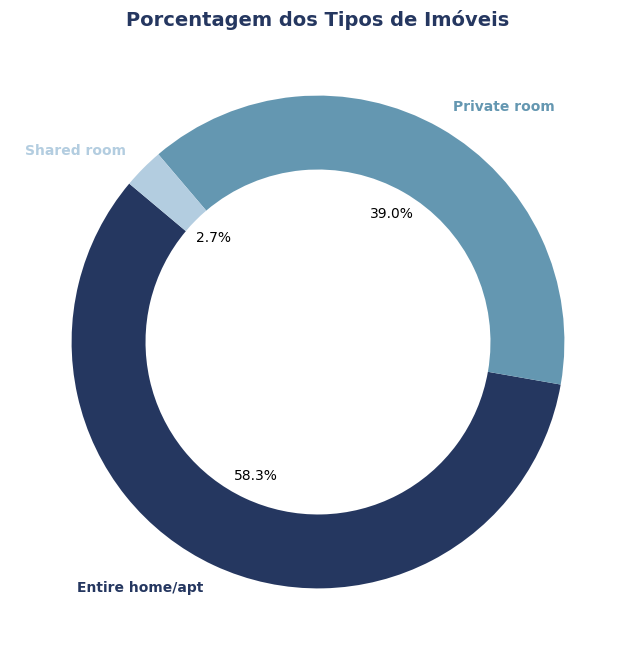

In [41]:
import matplotlib.pyplot as plt

# Definir cores para o gráfico
cores = ["#253760", "#6497b1", "#b3cde0"]

# Calcular a porcentagem de cada tipo de quarto
porcentagem = df_clean.room_type.value_counts() / df_clean.shape[0]

# Categorias principais que você quer manter
categorias_principais = ['Entire home/apt', 'Private room', 'Shared room']  # Substitua com os nomes reais

# Filtrar porcentagens para incluir apenas as categorias principais
porcentagem_filtrada = porcentagem[categorias_principais]

# Calcular a porcentagem para 'Outros'
porcentagem_outros = porcentagem.drop(categorias_principais).sum()
if porcentagem_outros > 0:
    porcentagem_filtrada['Outros'] = porcentagem_outros

# Assegurar que temos uma cor para cada categoria
while len(cores) < len(porcentagem_filtrada):
    cores.extend(cores)

# Definir as legendas das categorias
imoveis = porcentagem_filtrada.index.tolist()

# Plotar o gráfico de rosca
fig, ax = plt.subplots(figsize=(12, 8))
fatias, legendas, rotulos = ax.pie(porcentagem_filtrada, labels=imoveis, autopct='%1.1f%%', colors=cores, startangle=140, wedgeprops=dict(width=0.3))

# Definir estilos das legendas e rótulos
for i, legenda in enumerate(legendas):
    legenda.set_color(cores[i])
    legenda.set_fontweight('bold')

for rotulo in rotulos:
    rotulo.set_color('black')  # Alterando a cor para preto para melhor visibilidade

# Título
ax.set_title('Porcentagem dos Tipos de Imóveis', color="#253760", fontsize=14, fontweight='bold')

Nota-se que:
 - Quase 60% dos aluguéis do Airbnb, em San Francisco, são de casas ou apartamentos inteiros;
 
 - Aproximadamente 39% das propriedades são quartos privativos;
 
 - Quartos compartilhados representam 2.7% dos tipos de aluguéis de San Francisco no Airbnb.
 
Obs: Optei por utilizar um gráfico de rosca devido às quantidades de tipos de quartos, apenas 3 categorias, dessa forma, fica bem visível as divisões e o gráfico de rosca não se torna um problema.

### **Localidades mais caras do dataset e quantidade de imóveis para alugar por região**


In [22]:
list_cols = ['host_is_superhost',
             'cancellation_policy',
             'instant_bookable',
             'host_total_listings_count',
             'neighbourhood_cleansed',
             'latitude',
             'longitude',
             'property_type',
             'room_type',
             'accommodates',
             'bathrooms',
             'bedrooms',
             'beds',
             'bed_type',
             'minimum_nights',
             'number_of_reviews',
             'review_scores_rating',
             'review_scores_accuracy',
             'review_scores_cleanliness',
             'review_scores_checkin',
             'review_scores_communication',
             'review_scores_location',
             'review_scores_value',
             'price',
             'review_scores_rating_na',
             'review_scores_accuracy_na',
             'review_scores_cleanliness_na',
             'review_scores_checkin_na',
             'review_scores_communication_na',
             'review_scores_location_na',
             'review_scores_value_na'
            ]

In [23]:
df_airbnb = df_airbnb[list_cols]

In [24]:
df_airbnb

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
0,t,moderate,t,1.0,Western Addition,3776931.0,-12243386.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,1.0,180.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f,strict_14_with_grace_period,f,2.0,Bernal Heights,3774511.0,-12242102.0,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,30.0,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776669.0,-1224525.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776487.0,-12245183.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,f,strict_14_with_grace_period,f,2.0,Western Addition,3777525.0,-12243637.0,House,Entire home/apt,5.0,2022-05-01 00:00:00,2.0,2.0,Real Bed,7.0,27.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,f,flexible,t,18.0,Noe Valley,3774884.0,-1224283.0,House,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,30.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,163.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7142,t,flexible,t,10.0,Russian Hill,3780645.0,-12242109.0,Guest suite,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,1.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,160.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7143,t,flexible,t,10.0,Western Addition,3778855.0,-1224311.0,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,2.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,249.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7144,f,flexible,t,87.0,Downtown/Civic Center,3778645.0,-12241458.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,30.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,105.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
info = df_airbnb.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               7146 non-null   object 
 1   cancellation_policy             7146 non-null   object 
 2   instant_bookable                7146 non-null   object 
 3   host_total_listings_count       7146 non-null   float64
 4   neighbourhood_cleansed          7146 non-null   object 
 5   latitude                        7146 non-null   float64
 6   longitude                       7146 non-null   float64
 7   property_type                   7146 non-null   object 
 8   room_type                       7146 non-null   object 
 9   accommodates                    7146 non-null   float64
 10  bathrooms                       7146 non-null   object 
 11  bedrooms                        7146 non-null   float64
 12  beds                            71

In [26]:
data_types = df_airbnb.dtypes

In [27]:
duplicates = df_airbnb.duplicated().sum()

print(f"Número de linhas duplicadas: {duplicates}")

Número de linhas duplicadas: 0


In [28]:
df_airbnb.loc[:, 'latitude'] = df_airbnb['latitude'] / 10000
df_airbnb.loc[:, 'longitude'] = df_airbnb['longitude'] / 10000

correction_factor = 10
df_airbnb.loc[:, 'longitude'] = df_airbnb.apply(
    lambda row: row['longitude'] / correction_factor if abs(row['longitude']) > 180 else row['longitude'],
    axis=1
)
df_airbnb.loc[:, 'latitude'] = df_airbnb.apply(
    lambda row: row['latitude'] / correction_factor if abs(row['latitude']) > 90 else row['latitude'],
    axis=1
)

df_airbnb = df_airbnb[
    (df_airbnb['latitude'].between(24.396308, 49.384358)) &
    (df_airbnb['longitude'].between(-125.000000, -66.934570))
]

In [29]:
missing_values = df_airbnb.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_percentage = (missing_values / len(df_airbnb)) * 100

missing_df = pd.DataFrame({'Valores faltantes': missing_values, 'Porcentagem': missing_values_percentage})
missing_df.sort_values(by='Porcentagem', ascending=False)

,Valores faltantes,Porcentagem


In [30]:
print("Valores únicos em 'host_is_superhost':", df_airbnb['host_is_superhost'].unique())
print("Valores únicos em 'instant_bookable':", df_airbnb['instant_bookable'].unique())

print("Tamanho do DataFrame antes da conversão das variáveis binárias:", df_airbnb.shape)
binary_columns = ['host_is_superhost', 'instant_bookable']
for col in binary_columns:
    df_airbnb.loc[:, col] = df_airbnb.loc[:, col].map({'t': 1, 'f': 0})

print("Tamanho do DataFrame após a conversão das variáveis binárias:", df_airbnb.shape)

Valores únicos em 'host_is_superhost': ['t' 'f']
Valores únicos em 'instant_bookable': ['t' 'f']
Tamanho do DataFrame antes da conversão das variáveis binárias: (7002, 31)
Tamanho do DataFrame após a conversão das variáveis binárias: (7002, 31)


C:\Users\viviane.silva\AppData\Local\Temp\ipykernel_18436\2959438327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb.loc[:, col] = df_airbnb.loc[:, col].map({'t': 1, 'f': 0})
C:\Users\viviane.silva\AppData\Local\Temp\ipykernel_18436\2959438327.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_airbnb.loc[:, col] = df_airbnb.loc[:, col].map({'t': 1, 'f': 0})
C:\Users\viviane.silva\AppData\Local\Temp\ipykernel_18436\2959438327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [31]:
mapa = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

valid_data = df_airbnb.dropna(subset=['latitude', 'longitude'])
heat_data = [[row['latitude'], row['longitude']] for index, row in valid_data.iterrows()]

HeatMap(heat_data).add_to(mapa)

map_file_path = 'airbnb_heatmap.html'
mapa

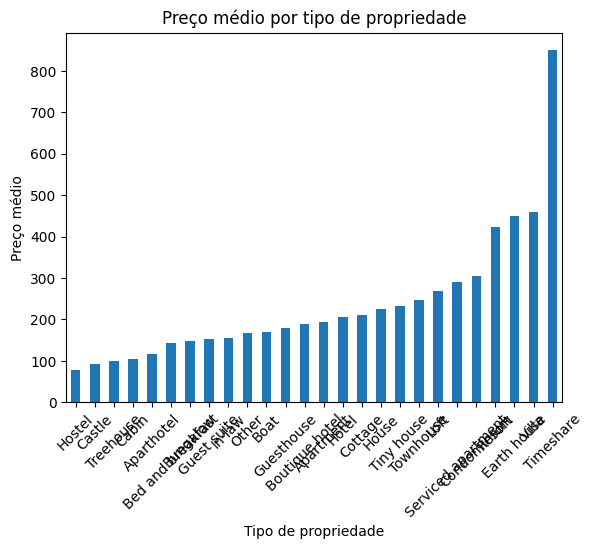

In [32]:
avg_price_per_property_type = df_airbnb.groupby('property_type')['price'].mean().sort_values()

avg_price_per_property_type.plot(kind='bar')
plt.title('Preço médio por tipo de propriedade')
plt.xlabel('Tipo de propriedade')
plt.ylabel('Preço médio')
plt.xticks(rotation=45)
plt.show()

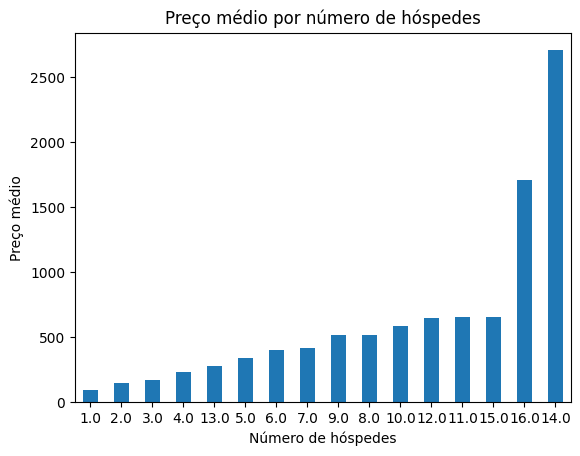

In [33]:
avg_price_per_guests = df_airbnb.groupby('accommodates')['price'].mean().sort_values()

avg_price_per_guests.plot(kind='bar')
plt.title('Preço médio por número de hóspedes')
plt.xlabel('Número de hóspedes')
plt.ylabel('Preço médio')
plt.xticks(rotation=0)
plt.show()

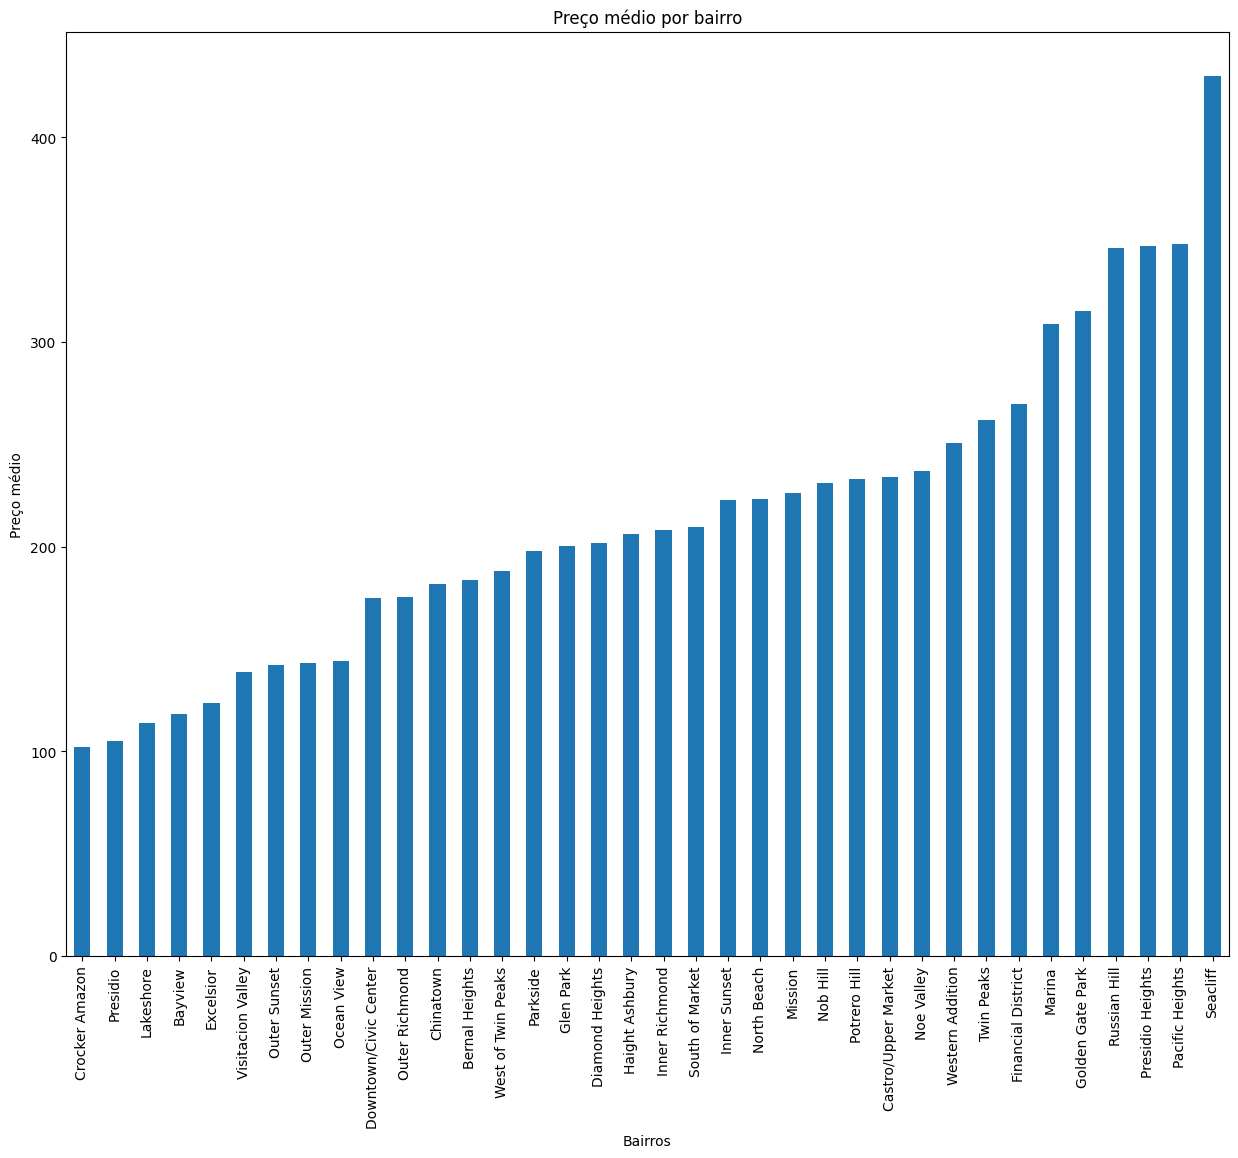

In [34]:
avg_price_per_guests = df_airbnb.groupby('neighbourhood_cleansed')['price'].mean().sort_values()

plt.figure(figsize=(15, 12))
avg_price_per_guests.plot(kind='bar')
plt.title('Preço médio por bairro')
plt.xlabel('Bairros')
plt.ylabel('Preço médio')
plt.xticks(rotation=90)
plt.show()

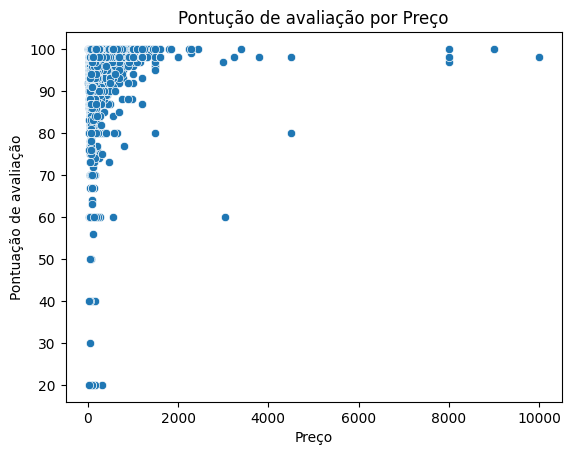

In [35]:
sns.scatterplot(x='price', y='review_scores_rating', data=df_airbnb)
plt.title('Pontução de avaliação por Preço')
plt.xlabel('Preço')
plt.ylabel('Pontuação de avaliação')
plt.show()

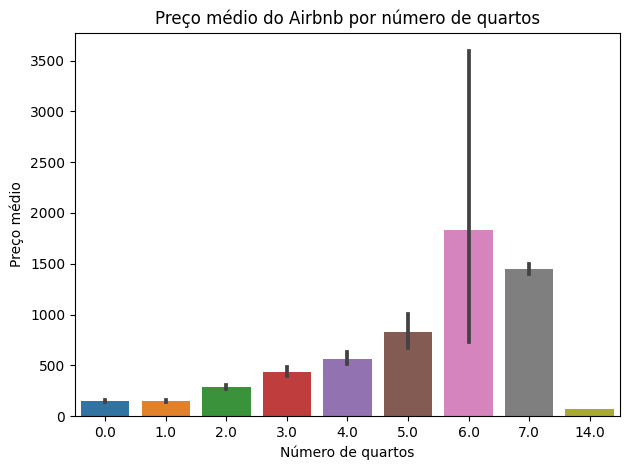

In [36]:
sns.barplot(x='bedrooms', y='price', data=df_airbnb)
plt.title('Preço médio do Airbnb por número de quartos')
plt.xlabel('Número de quartos')
plt.ylabel('Preço médio')
plt.tight_layout()
plt.show()

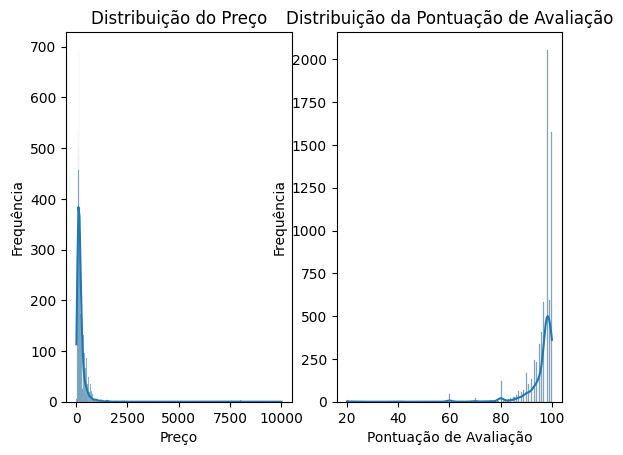

In [37]:
fig, axes = plt.subplots(1, 2)

sns.histplot(df_airbnb['price'], ax=axes[0], kde=True)
axes[0].set_title('Distribuição do Preço')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Frequência')

sns.histplot(df_airbnb['review_scores_rating'], ax=axes[1], kde=True)
axes[1].set_title('Distribuição da Pontuação de Avaliação')
axes[1].set_xlabel('Pontuação de Avaliação')
axes[1].set_ylabel('Frequência')

plt.show()

## Modelagem

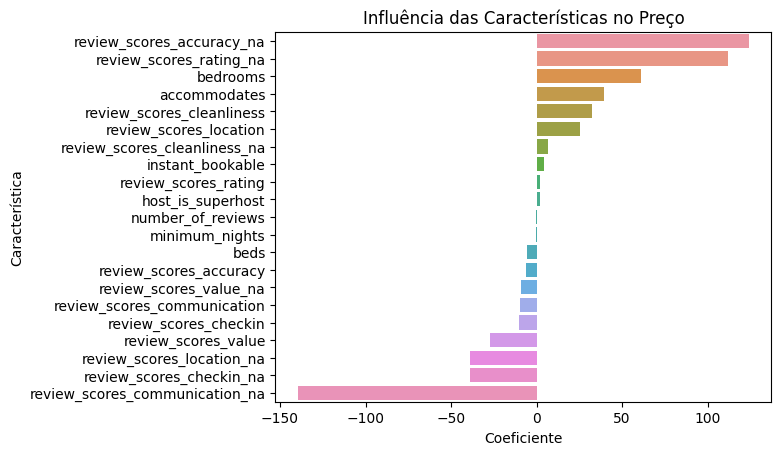

In [38]:
# Variáveis numéricas

df_numeric = df_airbnb.select_dtypes(include=[np.number])

df_numeric = df_numeric.drop(columns=['Unnamed: 0'], errors='ignore')

df_numeric = df_numeric.drop(columns=['latitude', 'longitude', 'host_total_listings_count'], errors='ignore')

df_numeric = df_numeric.fillna(df_numeric.mean())

X = df_numeric.drop('price', axis=1)
y = df_numeric['price']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Influência das Características no Preço')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()

In [39]:
# Variáveis categórias

categorical_columns = df_airbnb.select_dtypes(include=['object']).columns

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical = onehot_encoder.fit_transform(df_airbnb[categorical_columns])

X_categorical_df = pd.DataFrame(X_categorical, columns=onehot_encoder.get_feature_names_out(categorical_columns), index=df_airbnb.index)

# Concatenate ensuring aligned indices
X_combined = pd.concat([X, X_categorical_df], axis=1, join='inner')

model = LinearRegression()
model.fit(X_combined, y)

coefficients_categorical = model.coef_[-X_categorical_df.shape[1]:]

feature_importance_categorical = pd.DataFrame({
    'Feature': X_categorical_df.columns,
    'Coefficient': coefficients_categorical
})

feature_importance_categorical = feature_importance_categorical.sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=feature_importance_categorical.head(15))
plt.title('Influência das Características Categóricas no Preço')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['datetime', 'str']

In [ ]:
# Variáveis categórias que influenciam negativamente o preço
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_categorical.tail(14))
plt.title('Influência Negativa das Características Categóricas no Preço')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()